# Evaluate "LLM as a Judge" -- Overview Look

Goal: To compare the performance of LLM-as-a-Judge from the very start (first iteration) to where it is now ("final" iteration) to show the improvements we've made to its prompt. Both iterations will be displayed side by side on the same plot.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score, f1_score
import seaborn as sns

# Configure Matplotlib for inline display
%matplotlib inline

In [29]:
# Choose which llm-as-a-judge data to evaluate
common_path = "../../data/evaluations/"

llm_judge_filename_start = "2024-07-03-output_gpt35.csv"
llm_judge_filename_end = "transcripts_1.0_evaluation_2.csv"

llm_data_start = pd.read_csv(common_path + llm_judge_filename_start)
llm_data_end = pd.read_csv(common_path + llm_judge_filename_end)

# This is from our sweat blood and tears
human_data = pd.read_csv(common_path + '2024-06-06-human-judge.csv')

question_categories = {
    "symptoms": ["dyspnea", "pnd", "orthopnea", "ankle_edema", "nocturnal_cough", "chest_pain", "fatigue", "worsening_mental_status"],
    "medications": ["doctor_ask_medications"],
    "vitals": ["temperature", "heart_rate", "respiratory_rate", "oxygen_saturation", "blood_pressure", "weight"],
    "hcp_quality": ["sympathetic_patient", "reminder", "end_conversation", "no_premature_end", "natural_conversation"],
    # "patient_quality": ["plain_language", "consistent_symptoms", "no_confabulations", "allow_doctor_questions"],
}

# create a reverse mapping for renaming later
criteria_to_category_map = {criterion: category for category, criteria in question_categories.items() for criterion in criteria}

feature_columns_order = [v for values in question_categories.values() for v in values]

# rename each to standardize
columns_to_rename = {
    "Transcript Number": "transcript_number",
    "Patient Name": "patient_name",
    "Dyspnea": "dyspnea",
    "Dyspnea (shortness of breath) at rest, while walking or climbing stairs?": "dyspnea",
    "Paroxysmal Nocturnal Dyspnea (PND)": "pnd",
    "Paroxysmal Nocturnal Dyspnea (PND) (sudden shortness of breath at night)": "pnd",
    "Orthopnea (shortness of breath while lying flat)": "orthopnea",
    "Ankle edema or general lower extremity swelling (swelling in ankles or legs)": "ankle_edema",
    "Nocturnal cough (coughing at night)": "nocturnal_cough",
    "Chest pain": "chest_pain",
    "Fatigue": "fatigue",
    "Worsening mental status that is acute (sudden confusion or mental changes)": "worsening_mental_status",

    "Temperature (body temperature)": "temperature",
    "Heart rate (pulse)": "heart_rate",
    "Respiratory rate (number of breaths per minute)": "respiratory_rate",
    "Oxygen saturation (oxygen level in the blood)": "oxygen_saturation",
    "Blood pressure (systolic and diastolic) (upper and lower blood pressure numbers)": "blood_pressure",
    "Weight (body weight)": "weight",

    "Did the doctor ask the patient what medications they are on?": "doctor_ask_medications",

    "Be sympathetic when the patient reports symptoms or pain.": "sympathetic_patient",
    'Reminder: "Please remember to contact your healthcare provider if you notice any significant changes or worsening of symptoms."': "reminder",
    "End the Conversation: Express care and encourage the patient to reach out if they need further assistance.": "end_conversation",
    "Conversation flows naturally: no repetition": "natural_conversation",
    "conversation flows naturally: no repetition": "natural_conversation",
    "no premature end to conversation": "no_premature_end",

    "Patient uses plain language": "plain_language",
    "Patient is consistent about their symptoms": "consistent_symptoms",
    "Patient doesn’t invent information that contradicts the prompt (confabulations)": "no_confabulations",
    "Patient allows the doctor to ask questions and doesn’t take over direction of the conversation (offering information before it’s asked for)": "allow_doctor_questions",
}
human_data = human_data.rename(columns=columns_to_rename)
llm_data_start = llm_data_start.rename(columns=columns_to_rename)

# how many columns overlap of the 3 dfs?
overlap_columns = set(human_data.columns).intersection(set(llm_data_start.columns)).intersection(set(llm_data_end.columns))
print(f"{len(overlap_columns)} columns intersect. Expected: {len(feature_columns_order) + 1}")  # plus 1 for transcript number

columns_to_keep = feature_columns_order + ["transcript_number"]
for df in [human_data, llm_data_start, llm_data_end]:
    # let's filter only to the columns that we care about
    df.drop(columns=[c for c in df.columns if c not in columns_to_keep], inplace=True)

    # Ensure that the transcript numbers are exactly matched, and are in the same order
    df.sort_values(by='transcript_number', ascending=False, inplace=True)

assert set(human_data["transcript_number"]) == set(llm_data_start["transcript_number"]) == set(llm_data_end["transcript_number"])

25 columns intersect. Expected: 21


/Users/michaelenghoekhor/Library/Caches/pypoetry/virtualenvs/reco-analysis-vNTlTR5M-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/michaelenghoekhor/Library/Caches/pypoetry/virtualenvs/reco-analysis-vNTlTR5M-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:730: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/michaelenghoekhor/Library/Caches/pypoetry/virtualenvs/reco-analysis-vNTlTR5M-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/michaelenghoekhor/Libra

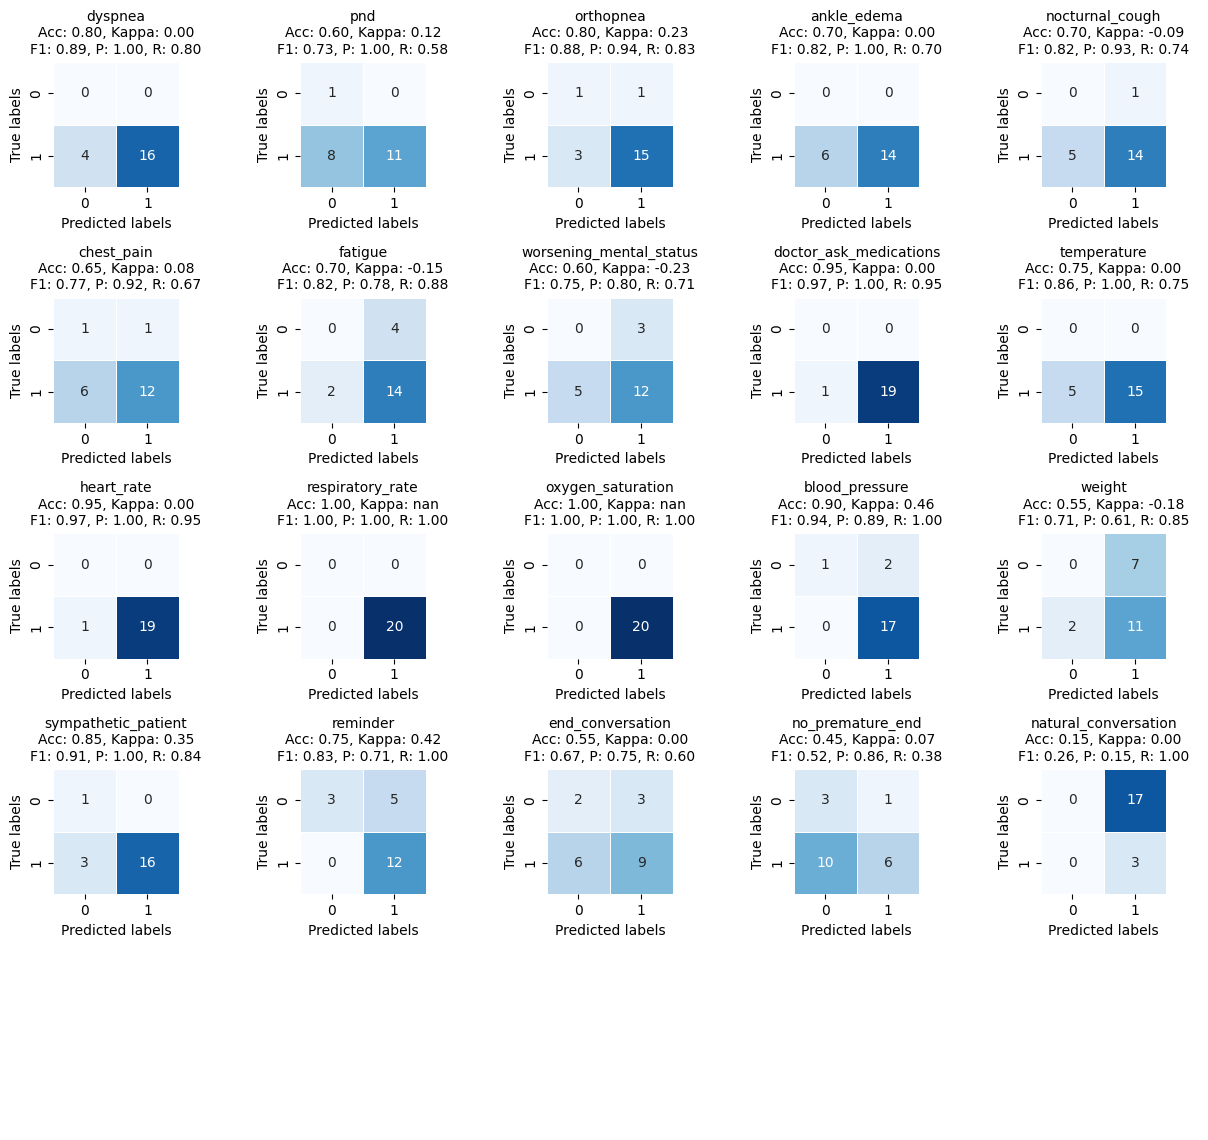

/Users/michaelenghoekhor/Library/Caches/pypoetry/virtualenvs/reco-analysis-vNTlTR5M-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/michaelenghoekhor/Library/Caches/pypoetry/virtualenvs/reco-analysis-vNTlTR5M-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:730: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/michaelenghoekhor/Library/Caches/pypoetry/virtualenvs/reco-analysis-vNTlTR5M-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/michaelenghoekhor/Libra

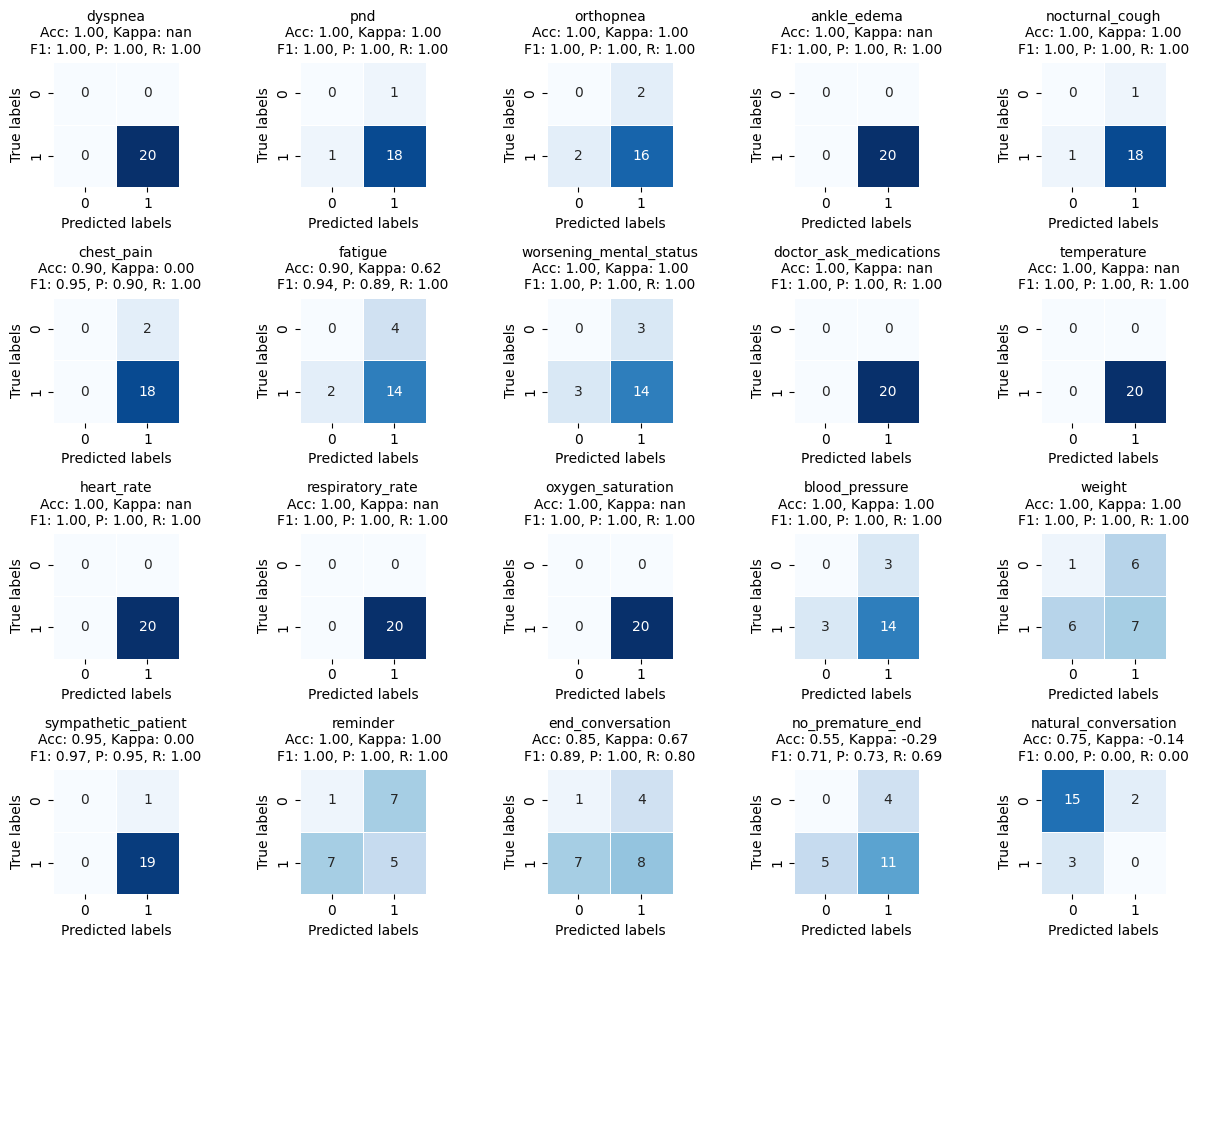

In [30]:
def calculate_metrics(data_true: pd.DataFrame, data_pred: pd.DataFrame, columns: list[str]):
    metrics = {}
    for col in columns:
        tp = np.sum((data_true[col] == 1) & (data_pred[col] == 1))
        tn = np.sum((data_true[col] == 0) & (data_pred[col] == 0))
        fp = np.sum((data_true[col] == 0) & (data_pred[col] == 1))
        fn = np.sum((data_true[col] == 1) & (data_pred[col] == 0))
        accuracy = accuracy_score(data_true[col], data_pred[col])
        kappa = cohen_kappa_score(data_true[col], data_pred[col])
        precision = precision_score(data_true[col], data_pred[col], zero_division=0)
        recall = recall_score(data_true[col], data_pred[col], zero_division=0)
        f1 = f1_score(data_true[col], data_pred[col], zero_division=0)

        metrics[col] = {
            'conf_matrix': [[tn, fp], [fn, tp]],
            'accuracy': accuracy,
            'kappa': kappa,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
    return metrics


def plot_confusion_matrices(metrics, nrows: int, ncols: int):
    # figure out the color scale first
    max_val = max([np.array(v['conf_matrix']).max() for v in metrics.values()])
    min_val = min([np.array(v['conf_matrix']).min() for v in metrics.values()])

    size = 2.5
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(size * ncols, size * nrows))
    # plt.suptitle(main_title)
    axes = axes.flatten()

    for i, (col, data) in enumerate(metrics.items()):
        sns.heatmap(
            data['conf_matrix'],
            annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues', ax=axes[i], cbar=False,
            vmin=min_val, vmax=max_val
        )
        axes[i].set_xlabel('Predicted labels')
        axes[i].set_ylabel('True labels')
        axes[i].set_title(
            f'{col}\nAcc: {data["accuracy"]:.2f}, Kappa: {data["kappa"]:.2f}\nF1: {data["f1"]:.2f}, P: {data["precision"]:.2f}, R: {data["recall"]:.2f}',
            fontsize=10,
        )

    # Hide any unused axes if there are any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig, axes

for llm_data in [llm_data_start, llm_data_end]:
    metrics = calculate_metrics(human_data, llm_data, feature_columns_order)
    columns_per_row = 5
    nrows = len(feature_columns_order) // columns_per_row + 1
    ncols = columns_per_row
    fig, axes = plot_confusion_matrices(metrics, nrows, ncols)
    plt.show()

/Users/michaelenghoekhor/Library/Caches/pypoetry/virtualenvs/reco-analysis-vNTlTR5M-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/michaelenghoekhor/Library/Caches/pypoetry/virtualenvs/reco-analysis-vNTlTR5M-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:730: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/michaelenghoekhor/Library/Caches/pypoetry/virtualenvs/reco-analysis-vNTlTR5M-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/michaelenghoekhor/Libra

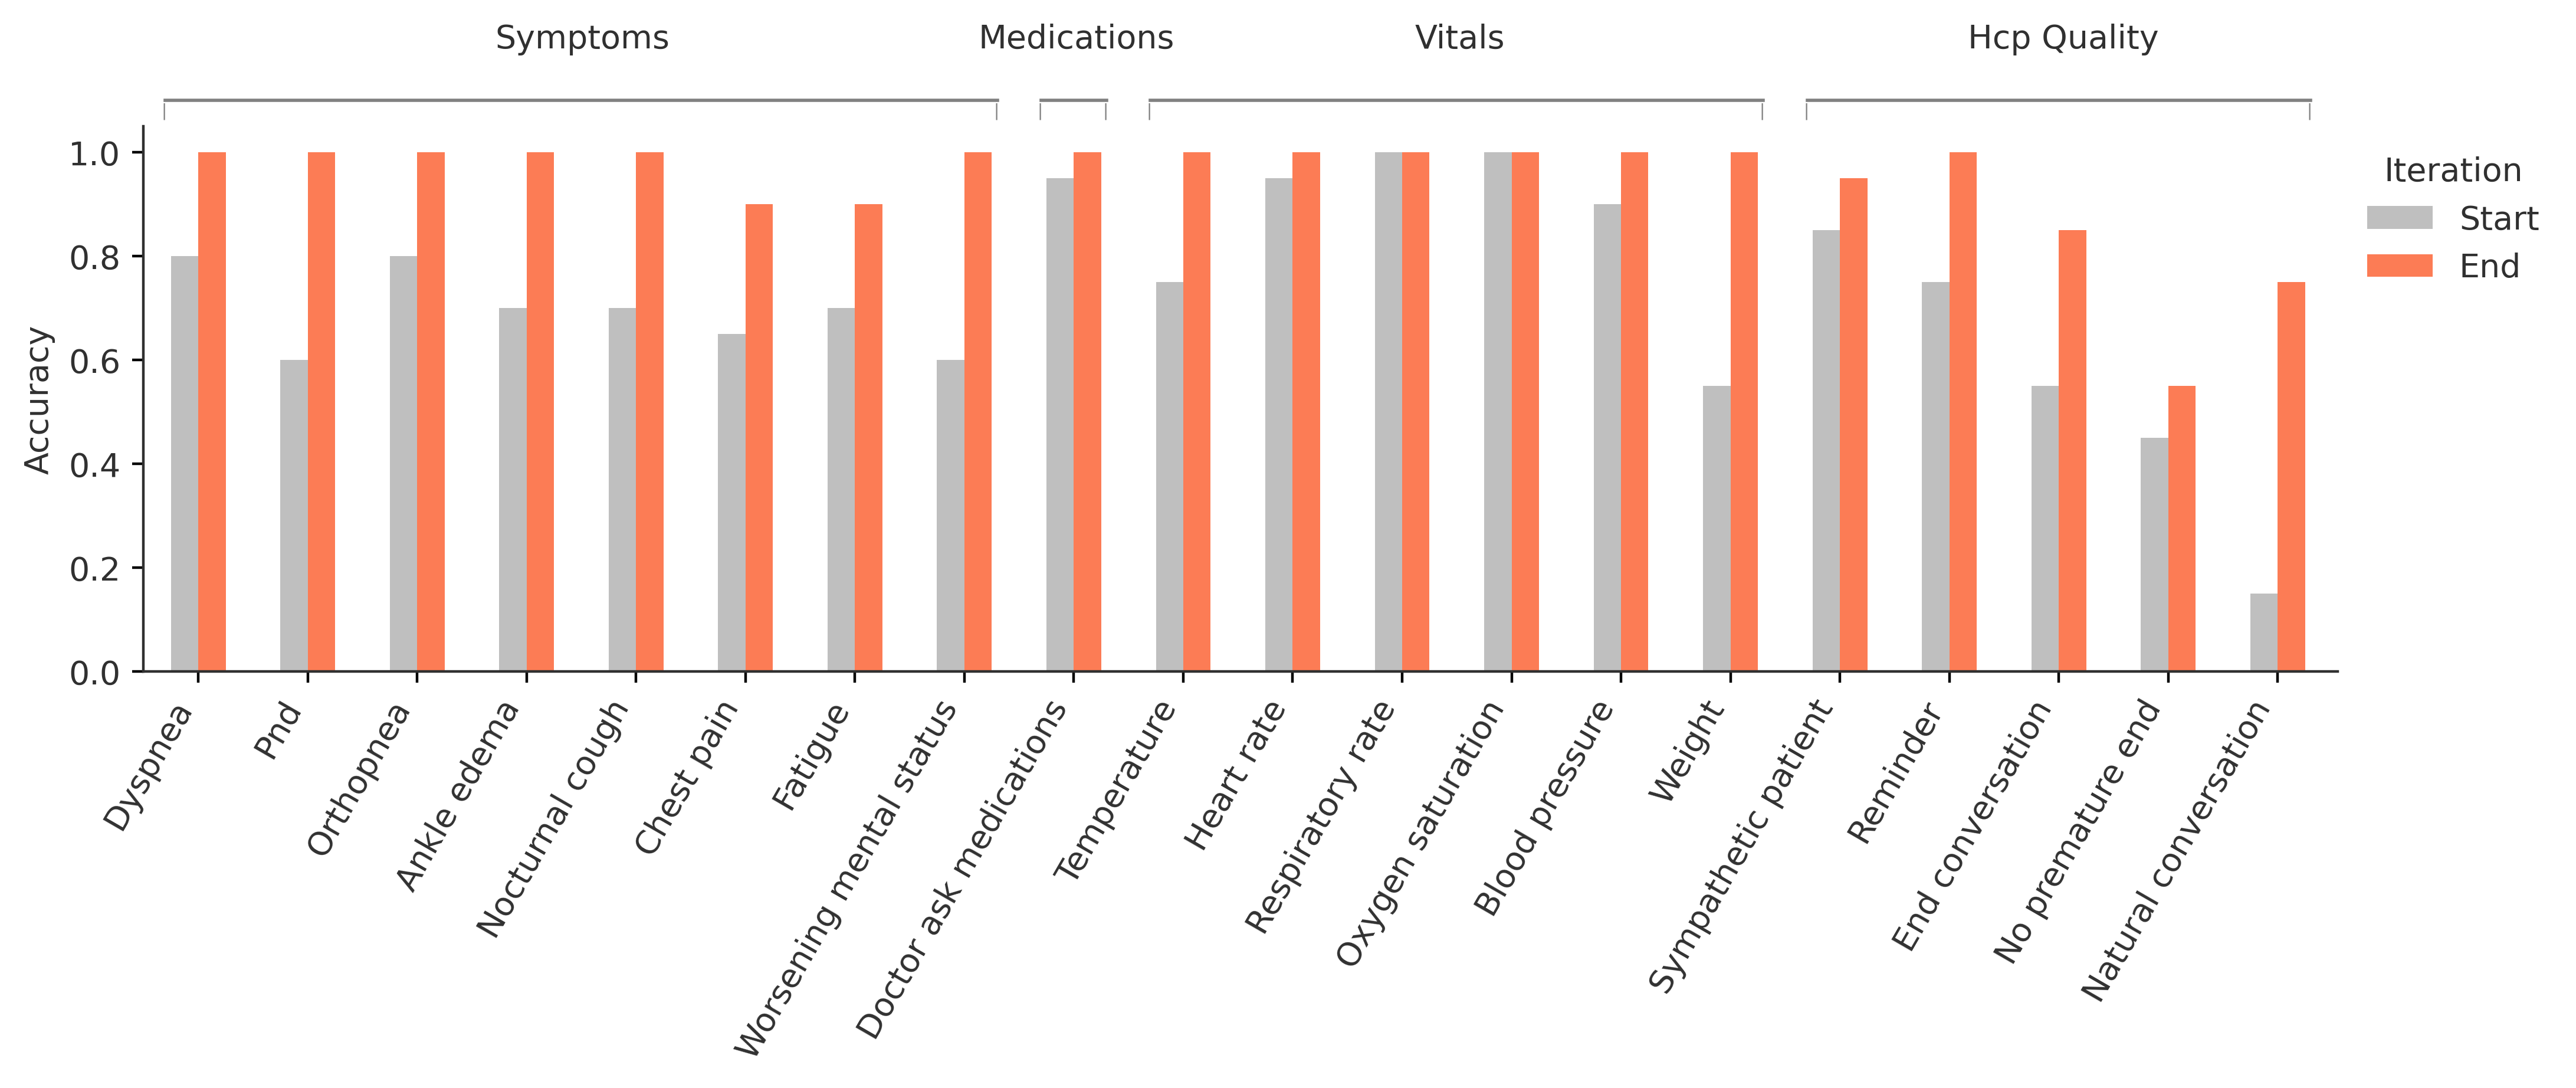

In [37]:
# now, the money plot: bar plot of llm_data_start and llm_data_end side-by-side,
# along all metrics (categorized)

metric_to_plot = "accuracy"  # choose from "accuracy", "kappa", "precision", "recall", "f1"

all_metrics = []
for iteration, llm_data in {"Start": llm_data_start, "End": llm_data_end}.items():
    metrics = pd.DataFrame(calculate_metrics(human_data, llm_data, feature_columns_order)).T
    metrics.index.name = "criteria"
    metrics = metrics.reset_index()
    metrics["iteration"] = iteration
    all_metrics.append(metrics)

df_plot_metric = pd.concat(all_metrics)
df_plot_metric["category"] = df_plot_metric["criteria"].map(criteria_to_category_map)
df_plot_metric = df_plot_metric[["iteration", "category", "criteria", metric_to_plot]]
# display(df_plot_metric)

# calculate average by category and iteration
df_plot_metric_avg = df_plot_metric.groupby(["iteration", "category"])[metric_to_plot].mean().reset_index()
# display(df_plot_metric_avg)

# now plot metric by question
fig, ax = plt.subplots(figsize=(12, 3), dpi=400)

df_plot = (
    df_plot_metric
    .pivot(index="criteria", columns="iteration", values=metric_to_plot)[["Start", "End"]]
    .reindex(feature_columns_order)
)

df_plot.plot(kind="bar", ax=ax, color=["#bfbfbf", "#fc7c55"])
# df_plot.plot(kind="bar", ax=ax, color=["#bfbfbf", "#ffffff"])

# styling
default_color = "#303030"
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Iteration")
ax.get_legend().get_frame().set_linewidth(0.0)
plt.setp(plt.gca().get_legend().get_title(), color=default_color)
plt.setp(plt.gca().get_legend().get_texts(), color=default_color)

# set default color for x-axis labels, y-axis labels, ticks, and spines
for label in (plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    label.set_color(default_color)
plt.gca().spines['bottom'].set_color(default_color)
plt.gca().spines['left'].set_color(default_color)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel(metric_to_plot.capitalize(), color=default_color)
plt.xlabel("", color=default_color)

# capitialize the xticks
plt.xticks(ticks=range(len(feature_columns_order)), labels=[x.replace("_", " ").capitalize() for x in feature_columns_order], rotation=60, ha="right")
plt.xlim(-0.5, len(feature_columns_order) - 0.45)
plt.ylim(0, 1.05)

# Add criteria group labels
for i, (group, items) in enumerate(question_categories.items()):
    start_index = feature_columns_order.index(items[0])
    end_index = feature_columns_order.index(items[-1])
    group_name_formatted = " ".join([x.capitalize() for x in group.split("_")])
    ax.annotate(group_name_formatted, xy=((start_index + end_index) / 40 + 0.025, 1.16), xycoords='axes fraction', ha='center', va='center', fontsize=10, color=default_color, annotation_clip=False)

    # draw a line from the start to the end
    line_height = 1.1
    extra_margin = 0.3
    ax.plot([start_index - extra_margin, end_index + extra_margin], [line_height, line_height], color='gray', lw=1, clip_on=False)

    # add small brackets at the start and end
    for x in [start_index - extra_margin, end_index + extra_margin]:
        ax.annotate("|", xy=(x - 0.01, line_height - 0.02), xycoords='data', ha='center', va='center', fontsize=5, color='gray', annotation_clip=False)

plt.show()